In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [7]:
#data_stats = data[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]
#round(data_stats.describe(),2)

In [8]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [10]:
region_stats = data.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<ipython-input-11-18899828c95e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


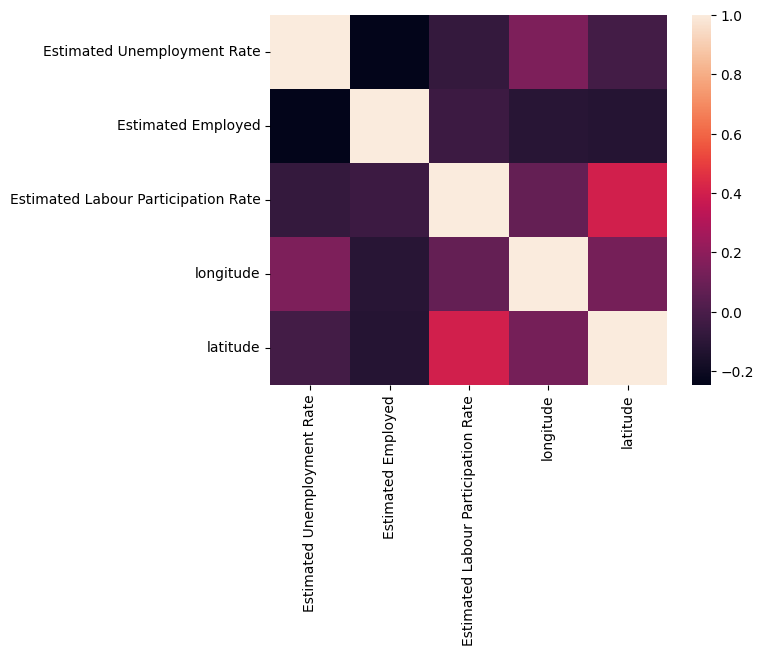

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr())
plt.show()

<ipython-input-12-ba54f54581a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat_maps = data.corr()


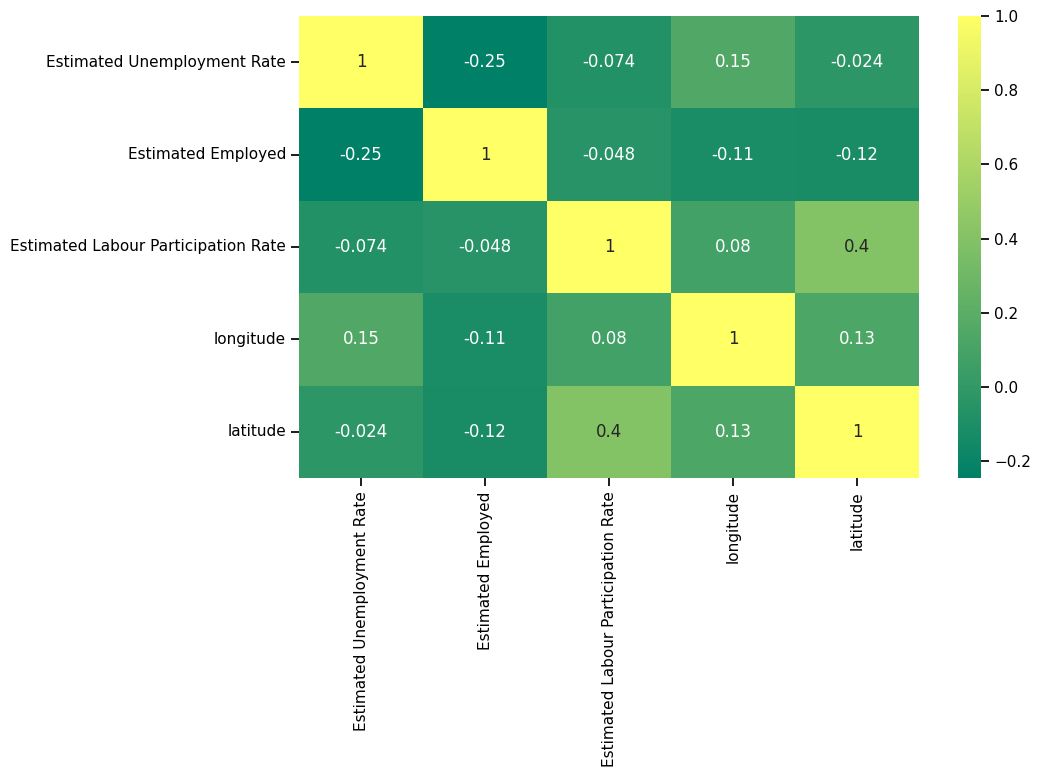

In [12]:
heat_maps = data.corr()
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

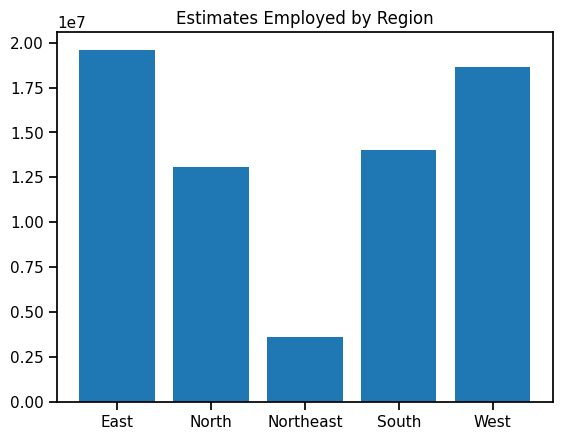

In [13]:
plt.title("Estimates Employed by Region")
x=region_stats.iloc[:,0]
y=region_stats.iloc[:,2]
plt.bar(x,y)
plt.show()


In [14]:
#plt.figure(figsize=(12, 10))
#lt.title("Indian Unemployment")
#sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
#plt.show()

In [15]:
import seaborn as sns
import plotly.express as px

In [16]:
unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

In [17]:
plot_ump = data[['Estimated Unemployment Rate','States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# color = sns.color_palette()
# group_df = data[['Estimated Unemployment Rate','States']]
# grouped_df = group_df.groupby(['States'])["Estimated Unemployment Rate"].aggregate("mean").reset_index()
# plt.figure(figsize=(12,8))
# sns.pointplot(grouped_df['States'].values, grouped_df['Estimated Unemployment Rate'].values, alpha=0.8, color=color[3])
# plt.ylabel('Mean rate', fontsize=12)
# plt.xlabel('States', fontsize=12)
# plt.title("Average of mean", fontsize=15)
# plt.xticks(rotation='vertical')
# plt.show()

In [19]:
gdp_data = pd.read_csv('gdp.csv')
gdp_data=gdp_data.drop(['Rank','Unnamed: 3'],axis=1)
gdp_data

,State,Gdp
0,Goa,435959
1,Sikkim,403376
2,Delhi,376221
3,Chandigarh,330015
4,Haryana,247628
5,Telangana,233325
6,Karnataka,223175
7,Kerala,221904
8,Puducherry,220949
9,Andaman and Nicobar Islands,218649


In [20]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   33 non-null     object
 1   Gdp     33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


In [21]:
gdp_data.describe()

,Gdp
count,33.000000
mean,180556.393939
std,96938.408313
min,46292.000000
25%,104989.000000
50%,169742.000000
75%,220949.000000
max,435959.000000


In [22]:
State = gdp_data.iloc[:,0]
Gdp = gdp_data.iloc[:,1]
df = pd.DataFrame({"State":State,"Gdp":Gdp})
df

,State,Gdp
0,Goa,435959
1,Sikkim,403376
2,Delhi,376221
3,Chandigarh,330015
4,Haryana,247628
5,Telangana,233325
6,Karnataka,223175
7,Kerala,221904
8,Puducherry,220949
9,Andaman and Nicobar Islands,218649


<Axes: xlabel='State', ylabel='Gdp'>

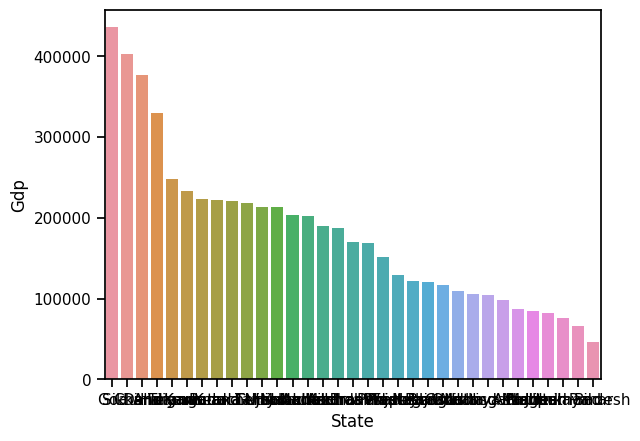

In [23]:
sns.barplot(x='State',y="Gdp",data=df)

In [24]:
plt_gdp = gdp_data[['State',"Gdp"]]
fig = px.bar(plt_gdp,x="State",y="Gdp")
fig.show()

In [25]:
# import seaborn as sns
# group_df = gdp_data[['Gdp',"State"]]
# grouped_df = group_df.groupby(['State'])["Gdp"].aggregate("mean").reset_index()
# plt.figure(figsize=(12,8))
# sns.pointplot(grouped_df['Gdp'].values, grouped_df['State'].values, alpha=0.8, color=color[2])
# plt.ylabel('GDP', fontsize=12)
# plt.xlabel('States', fontsize=12)
# plt.title("Average of GDP", fontsize=15)
# plt.xticks(rotation='horizontal')
# plt.show()

NameError: ignored

<Figure size 1200x800 with 0 Axes>

In [26]:
gdp = gdp_data[["State","Gdp"]]
figure = px.sunburst(gdp, path=["State"],
                     values="Gdp",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="GDP of India")
figure.show()

In [27]:
plot_ump = data[['Estimated Unemployment Rate','States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

plt_gdp = gdp_data[['State',"Gdp"]]
fig = px.bar(plt_gdp,x="State",y="Gdp",title="GDP in each state")
fig.show()